<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

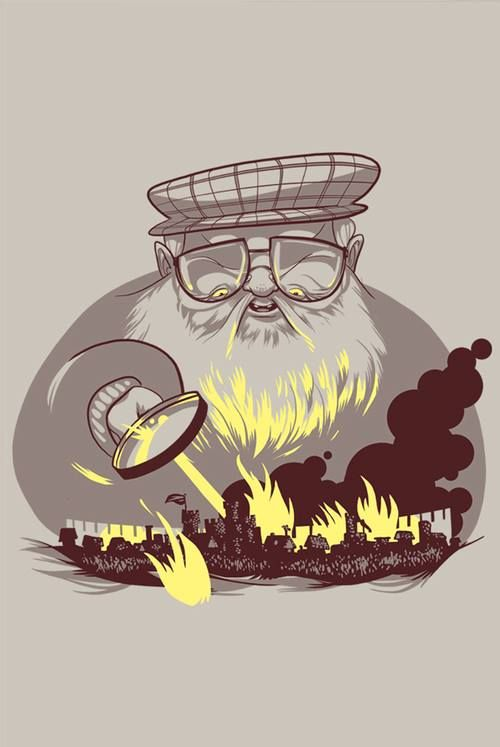

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [2]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 80.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 70.6MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [22]:
data_train = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
data_test  = pd.read_csv('/content/game_of_thrones_test.csv',  index_col='S.No')
data = pd.concat([data_train, data_test], axis = 0)

train_size = 1557
test_size = 389

data_train

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [24]:
median_dateOfBirth = np.quantile(data['dateOfBirth'].dropna().values, q=0.5)
# Заменяем NaN на медиану
data['dateOfBirth'] = data['dateOfBirth'].fillna(median_dateOfBirth)

median_age = np.quantile(data['age'].dropna().values, q=0.5)\
# Заменяем NaN на медиану
data['age'] = data['age'].fillna(median_dateOfBirth)

data.isna().sum()

,0
name,0
title,1008
male,0
culture,1269
dateOfBirth,0
mother,1925
father,1920
heir,1923
house,427
spouse,1670


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [6]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
data.drop(columns=['numDeadRelations'], inplace=True)

In [7]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Создаем обратный словарь для быстрого поиска
reverse_cult = {variant: key for key, variants in cult.items() for variant in variants}

# Функция для замены культуры на общее название
def simplify_culture(culture):
    return reverse_cult.get(culture, culture)  # Если культура не найдена, оставляем как есть

# Применяем функцию к столбцу 'culture'
data['culture'] = data['culture'].apply(simplify_culture)
data['culture'] = data['culture'].fillna("noCulture")

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [8]:
data.drop(columns=['name', 'mother', 'father', 'heir', 'spouse', 'popularity',
                   'book1', 'book2', 'book3', 'book4', 'book5'], inplace = True)
data.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)
data.isna().sum()

,0
title,1008
male,0
culture,0
dateOfBirth,0
house,427
isMarried,0
isNoble,0
age,0
isAlive,389
isPopular,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

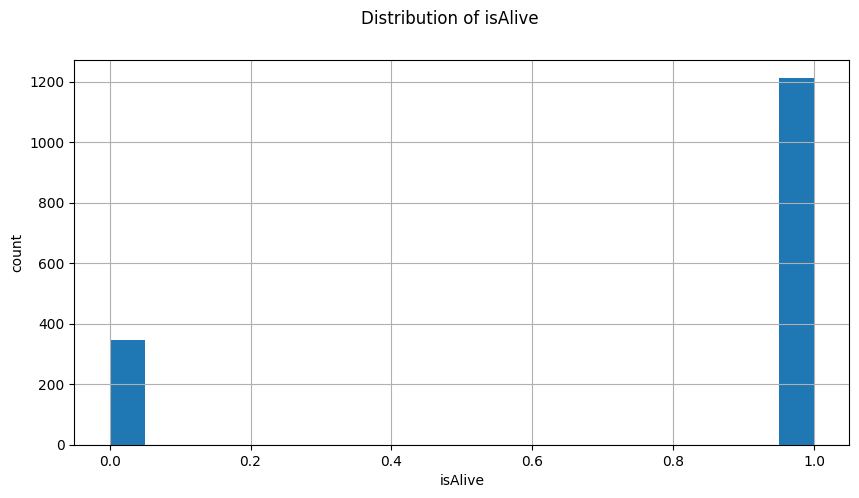

In [9]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.suptitle('Distribution of isAlive')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [10]:
# анализ категориальных признаков, сведение редких титулов и домов в едином классам

data['title'] = data['title'].fillna('noTitle')
title_counts = data['title'].value_counts()
data['title'] = data['title'].apply(lambda x: x if title_counts[x] > 10 else 'rareTitle')

data['house'] = data['house'].fillna('noHouse')
house_counts = data['house'].value_counts()
data['house'] = data['house'].apply(lambda x: x if house_counts[x] > 10 else 'rareHouse')
data

,title,male,culture,dateOfBirth,house,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,
1,noTitle,1,noCulture,268.0,noHouse,0,0,268.0,0.0,1,1
2,rareTitle,1,Rivermen,208.0,House Frey,1,1,97.0,1.0,1,1
3,Ser,1,noCulture,268.0,rareHouse,0,1,268.0,1.0,0,0
4,rareTitle,0,noCulture,82.0,House Arryn,1,1,23.0,0.0,0,0
5,rareTitle,0,Dornish,276.0,rareHouse,1,1,29.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1942,noTitle,1,Westeros,268.0,House Stark,0,0,268.0,NaN,0,0
1943,noTitle,1,noCulture,268.0,House Bolton,0,0,268.0,NaN,0,0
1944,noTitle,1,noCulture,268.0,noHouse,0,0,268.0,NaN,0,0


In [11]:
# кодировка категориальных призанков

from sklearn.preprocessing import OneHotEncoder

cat_features = ['title', 'house', 'culture']
encoder = OneHotEncoder(sparse_output=False)
encoded_cat = encoder.fit_transform(data[cat_features])
one_hot_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_features), index=data.index)
one_hot_df

,title_Archmaester,title_Lady,title_Lord,title_Maester,title_Princess,title_Septon,title_Ser,title_Winterfell,title_noTitle,title_rareTitle,...,culture_Valemen,culture_Valyrian,culture_Westerlands,culture_Westerman,culture_Westermen,culture_Westeros,culture_Wildling,culture_Wildlings,culture_ironborn,culture_noCulture
S.No,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
data = pd.concat([data, one_hot_df], axis = 1)
data = data.drop(cat_features, axis = 1)
data

,male,dateOfBirth,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations,title_Archmaester,title_Lady,...,culture_Valemen,culture_Valyrian,culture_Westerlands,culture_Westerman,culture_Westermen,culture_Westeros,culture_Wildling,culture_Wildlings,culture_ironborn,culture_noCulture
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,268.0,0,0,268.0,0.0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,208.0,1,1,97.0,1.0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,268.0,0,1,268.0,1.0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,82.0,1,1,23.0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,276.0,1,1,29.0,1.0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,268.0,0,0,268.0,NaN,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1943,1,268.0,0,0,268.0,NaN,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1944,1,268.0,0,0,268.0,NaN,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

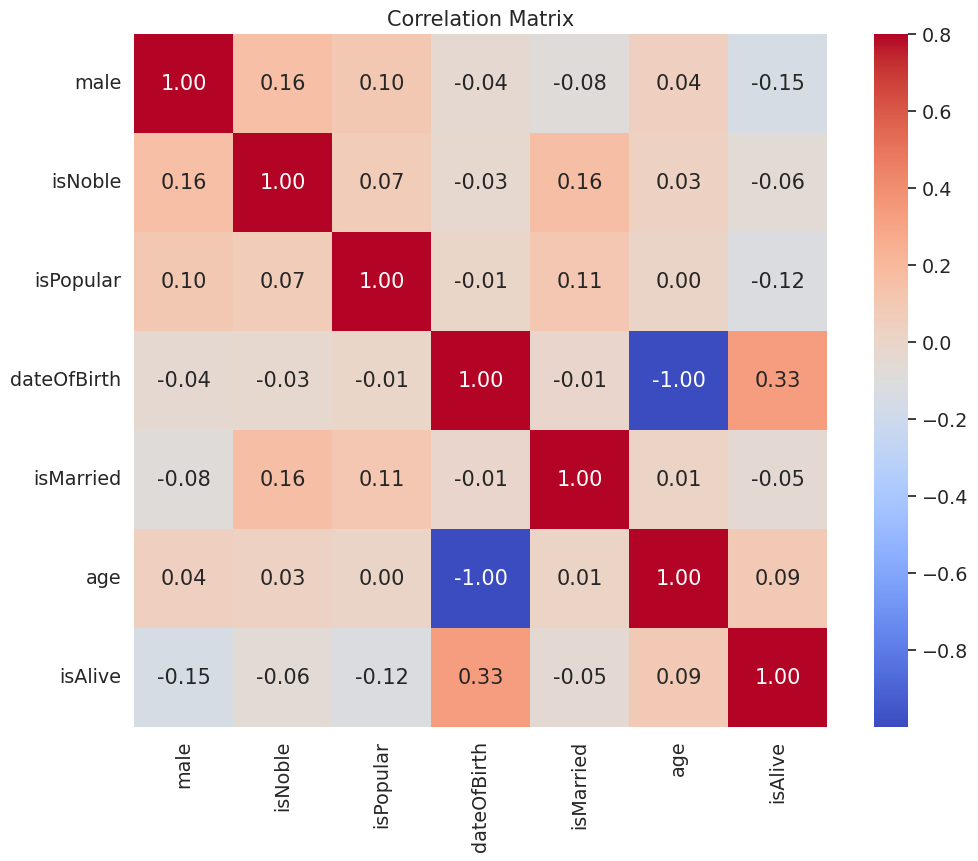

In [21]:
corr_mat = data[['male', 'isNoble', 'isPopular', 'dateOfBirth', 'isMarried', 'age', 'isAlive']].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Из таблицы видно, что есть корелляция между возрастом и датой рождения, что логично. Один из этих признаков надо удалить. Удалим дату рождения (нет разницы что удалять так как там и там +- одиноковое количество пропуском в начальном датасете)


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [21]:
data_train = data.iloc[:train_size]
data_test = data.iloc[train_size:train_size + test_size]
X = data_train.drop(columns=['isAlive'])
y = data_train['isAlive']
y

,isAlive
S.No,
1,0.0
2,1.0
3,1.0
4,0.0
5,1.0
...,...
1553,1.0
1554,0.0
1555,0.0


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [24]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [73]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
tmp = X_train
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [76]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=10, max_iter=1000, solver='newton-cg')

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [27]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [77]:
# Шаг 3. Предсказание на тестовых данных
# y_pred = logistic_regression.predict(X_test)

# # Шаг 4. Оценка предсказания по метрике accuracy
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8109


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [29]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 10.9MB/s]


In [43]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [69]:
test = data_test.drop(columns=['isAlive'])
test = scaler.transform(test)
submission['isAlive'] = logistic_regression.predict(test)
submission

,isAlive
S.No,
1558,0.0
1559,1.0
1560,1.0
1561,1.0
1562,1.0
...,...
1942,1.0
1943,1.0
1944,1.0


Как сохранить измененный Pandas DataFrame в csv файл:

In [66]:
submission.to_csv("/content/new_submission.csv", index=False)